In [ ]:

import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/Sujal_Project_/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic-dataset/Titanic-Dataset.csv


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score,LeaveOneOut
from sklearn.metrics import accuracy_score,make_scorer,f1_score,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import scikitplot as skplt
import warnings
warnings.simplefilter(action='ignore')

**EDA**

In [ ]:
df=pd.read_csv("/Sujal_Project/input/titanic-dataset/Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.drop(["PassengerId","Name","Cabin","Ticket"],inplace=True,axis=1)

In [ ]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df["Age"]=df["Age"].fillna(df["Age"].mean())

In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
df["Embarked"].replace(["C","S","Q"],["Cherbourg","Southampton","Queenstown"])

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: Embarked, Length: 889, dtype: object

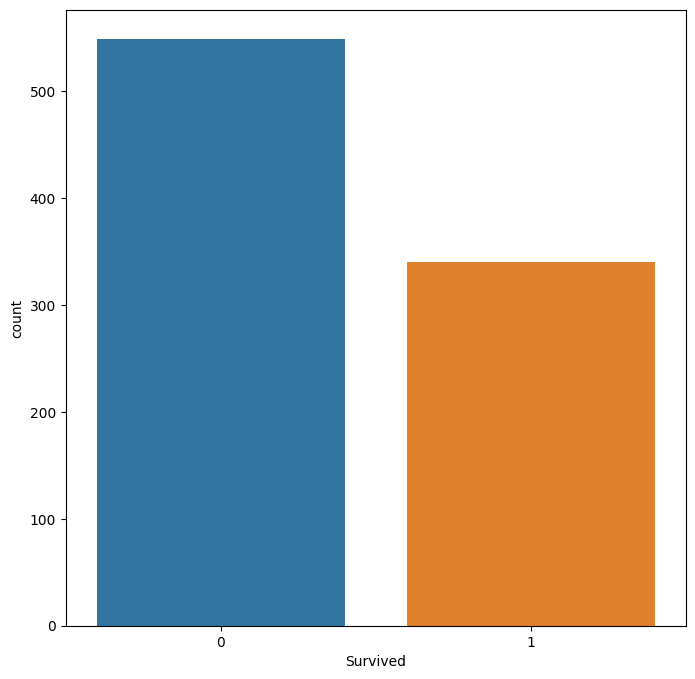

In [ ]:
plt.figure(figsize=(8, 8))
sns.countplot(x="Survived",data=df)
plt.show()

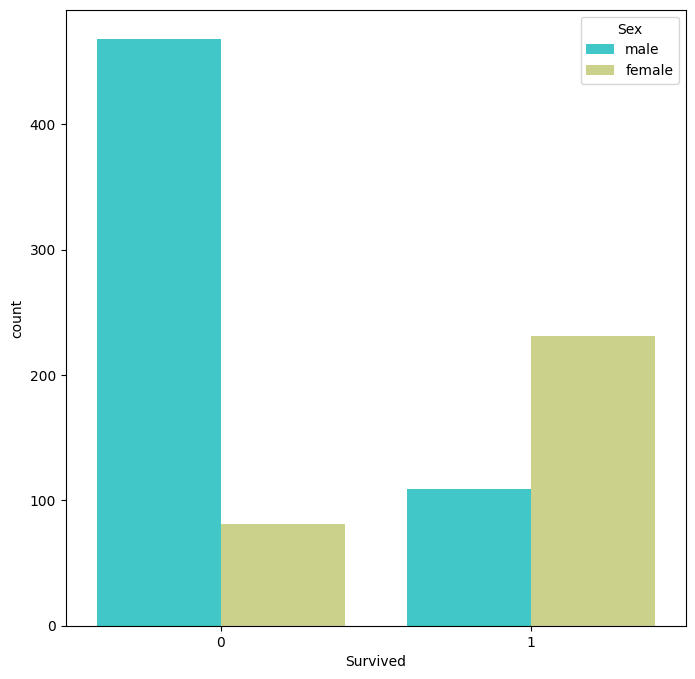

In [ ]:
plt.figure(figsize=(8, 8))
sns.countplot(x="Survived",data=df, hue="Sex",palette="rainbow")
plt.show()

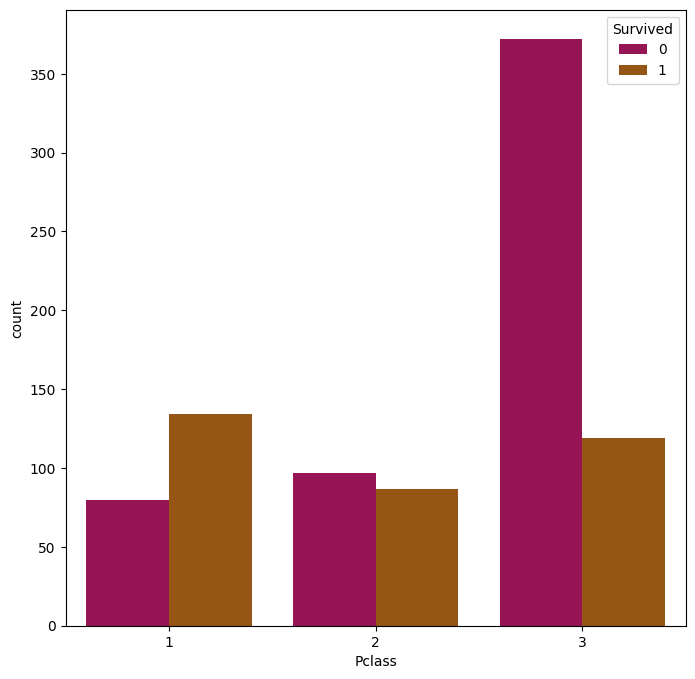

In [ ]:
plt.figure(figsize=(8, 8))
sns.countplot(x="Pclass",data=df, hue="Survived",palette="brg")
plt.show()

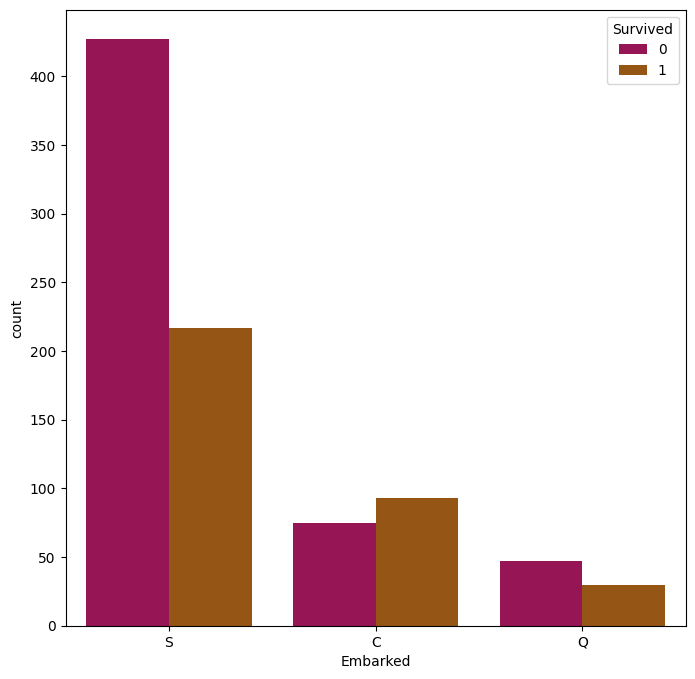

In [ ]:
plt.figure(figsize=(8, 8))
sns.countplot(x="Embarked",data=df, hue="Survived",palette="brg")
plt.show()

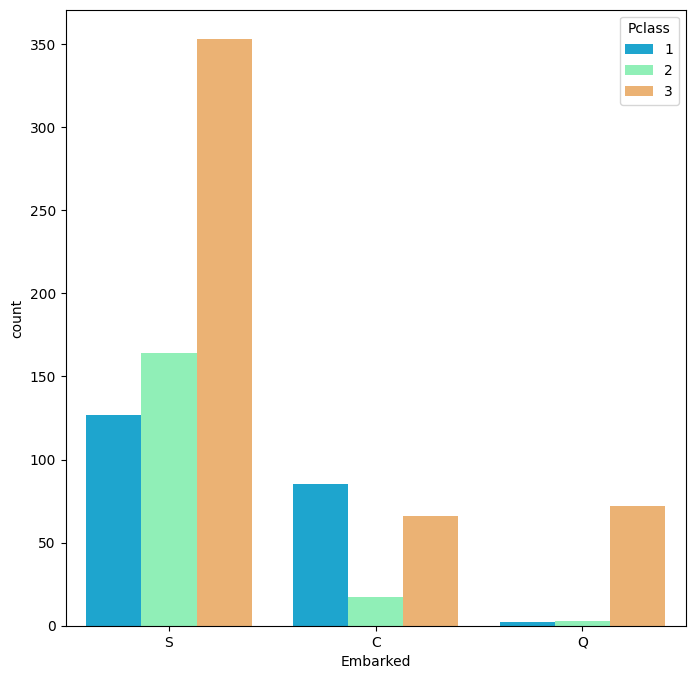

In [ ]:
plt.figure(figsize=(8, 8))
sns.countplot(x="Embarked",data=df, hue="Pclass",palette="rainbow")
plt.show()

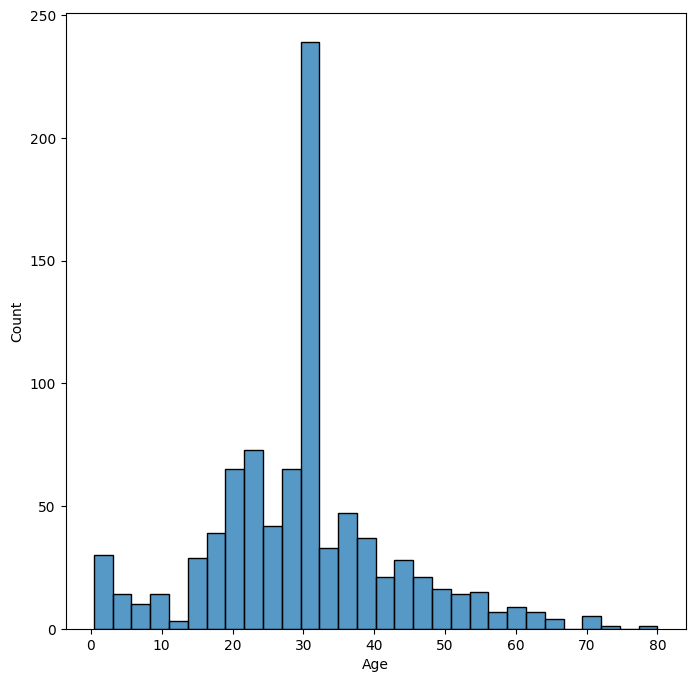

In [ ]:
plt.figure(figsize=(8, 8))
sns.histplot(x="Age",data=df,palette="rainbow")
plt.show()

In [ ]:
df=pd.get_dummies(df,["sex","Embarked"])

In [ ]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,sex_female,sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,False,True,False,False,True
1,1,1,38.000000,1,0,71.2833,True,False,True,False,False
2,1,3,26.000000,0,0,7.9250,True,False,False,False,True
3,1,1,35.000000,1,0,53.1000,True,False,False,False,True
4,0,3,35.000000,0,0,8.0500,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,False,True,False,False,True
887,1,1,19.000000,0,0,30.0000,True,False,False,False,True
888,0,3,29.699118,1,2,23.4500,True,False,False,False,True
889,1,1,26.000000,0,0,30.0000,False,True,True,False,False


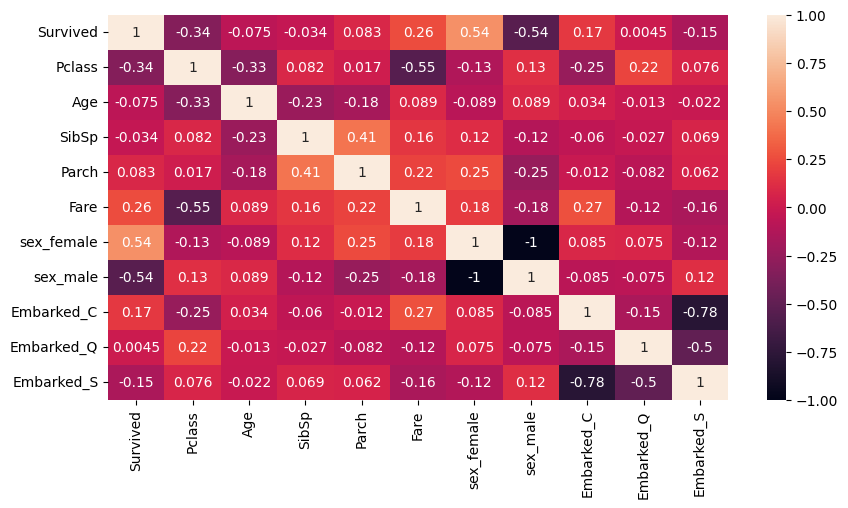

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
X=df.drop("Survived",axis=1)
y=df["Survived"]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,stratify=y,random_state=0)

**EXTRA TREES**

In [ ]:
ex=ExtraTreesClassifier(n_estimators=110,max_depth=12,random_state=0)
scores=cross_val_score(ex,X_train,y_train,cv=LeaveOneOut(),n_jobs=-1,scoring=make_scorer(f1_score,average="micro"))
print(scores.mean(),scores.std())

0.7958199356913184 0.40310118537109796


In [ ]:
ex.fit(X_train,y_train)

ExtraTreesClassifier(max_depth=12, n_estimators=110, random_state=0)

In [ ]:
pre=ex.predict(X_test)
print(f1_score(y_test,pre,average="micro"))

0.842696629213483


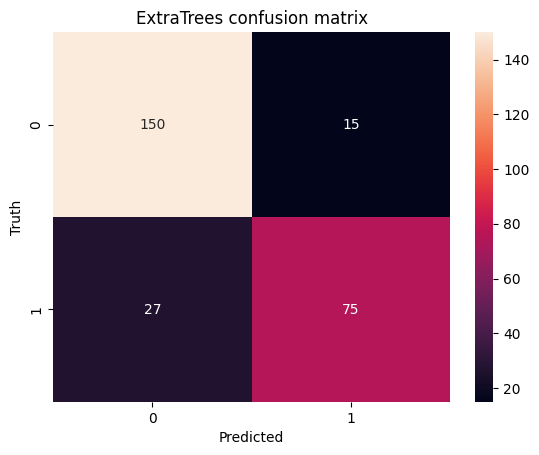

In [ ]:
cm = skplt.metrics.confusion_matrix(y_test, pre)
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title(f"ExtraTrees confusion matrix")
plt.show()

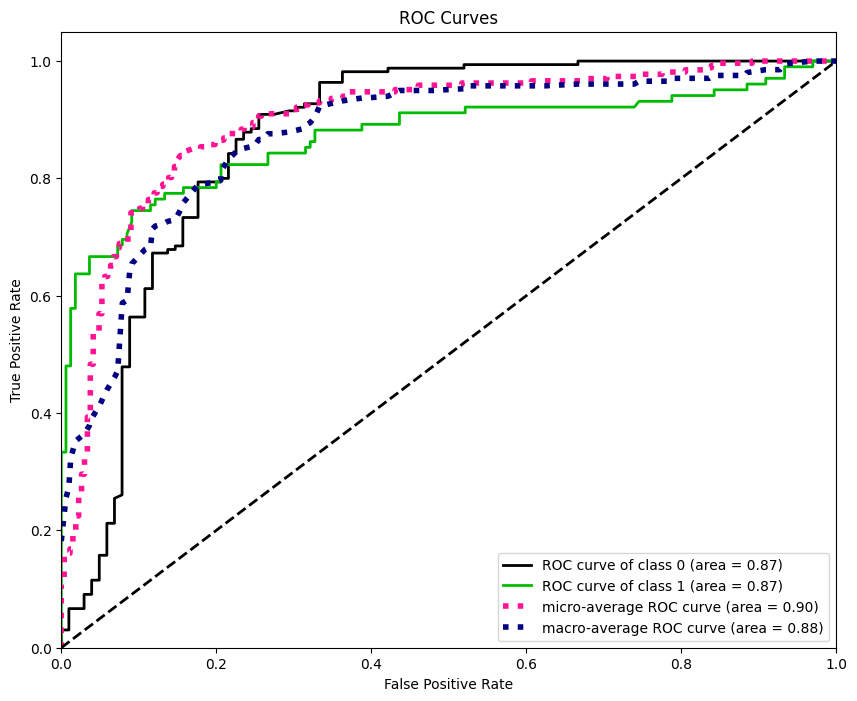

In [ ]:
skplt.metrics.plot_roc(y_test,ex.predict_proba(X_test),figsize=(10,8))
plt.show()

**GradientBoosting**

In [ ]:
gb=GradientBoostingClassifier(n_estimators=50,max_depth=5)
scores=cross_val_score(gb,X_train,y_train,cv=LeaveOneOut(),n_jobs=-1,scoring=make_scorer(f1_score,average="micro"))
print(scores.mean(),scores.std())

0.8102893890675241 0.3920720533678761


In [ ]:
gb.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=50)

In [ ]:
pre_gb=gb.predict(X_test)
print(f1_score(y_test,pre_gb,average="micro"))

0.8726591760299626


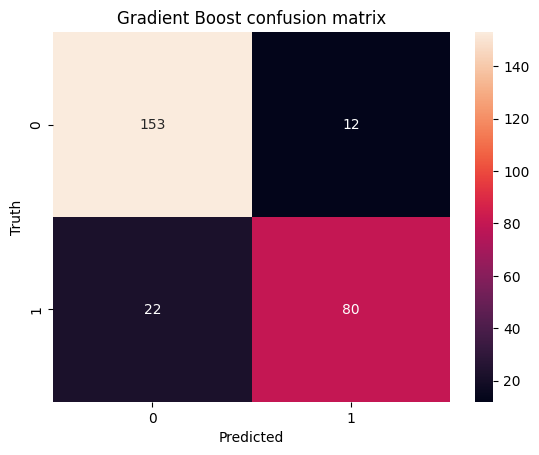

In [ ]:
cm = skplt.metrics.confusion_matrix(y_test, pre_gb)
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title(f"Gradient Boost confusion matrix")
plt.show()



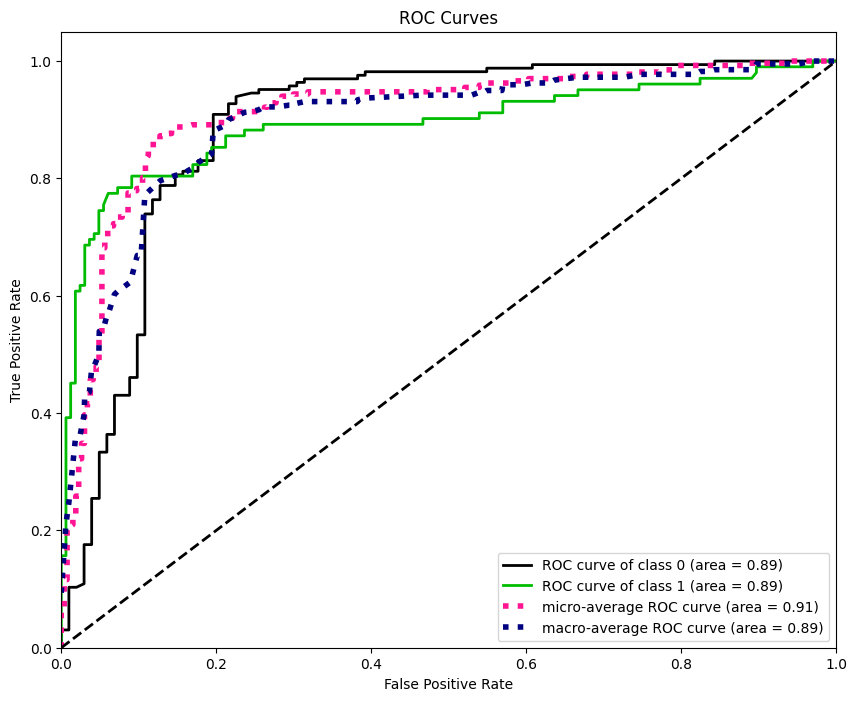

In [ ]:
skplt.metrics.plot_roc(y_test,gb.predict_proba(X_test),figsize=(10,8))
plt.show()

**LogisticRegression**

In [ ]:
lr=LogisticRegression(max_iter=2000,C=1)
scores=cross_val_score(lr,X_train,y_train,cv=LeaveOneOut(),n_jobs=-1,scoring=make_scorer(f1_score,average="micro"))
print(scores.mean(),scores.std())

0.7845659163987139 0.41112314362507035


In [ ]:
lr.fit(X_train,y_train)

LogisticRegression(C=1, max_iter=2000)

In [ ]:
pre_lr=lr.predict(X_test)
print(f1_score(y_test,pre_lr,average="micro"))

0.8164794007490637


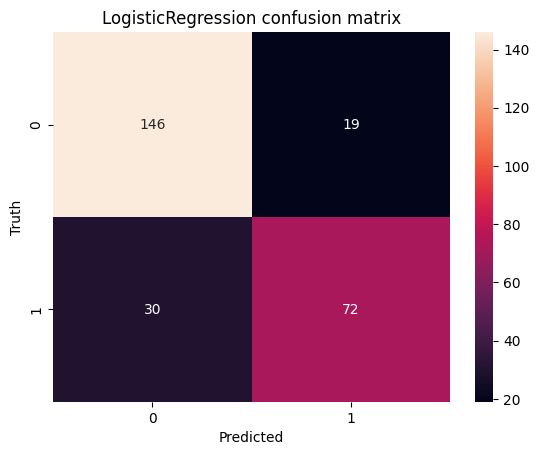

In [ ]:
cm = skplt.metrics.confusion_matrix(y_test, pre_lr)
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title(f"LogisticRegression confusion matrix")
plt.show()

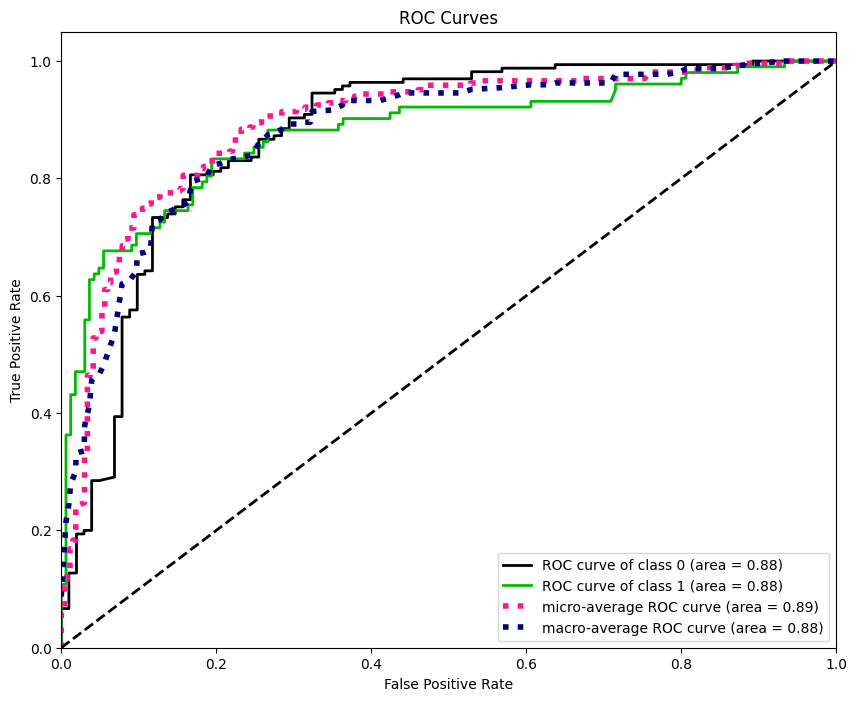

In [ ]:
skplt.metrics.plot_roc(y_test,lr.predict_proba(X_test),figsize=(10,8))
plt.show()